# Fourier Ptychography Recovery

This notebook is used to analyze the results of the simulation and recovery tools provided by this library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from leb.freeze import fp_recover, fp_simulation

In [6]:
# Simulate a FP dataset
dataset, pupil, ground_truth = fp_simulation(num_leds=(32, 32), center_led=(16, 16), led_pitch_mm=(2,2))

# Recover the complex object
result = fp_recover(dataset, pupil)

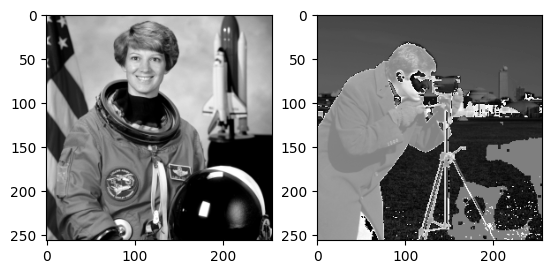

In [7]:
# Ground truth magnitude and phase
io.imshow_collection([np.abs(ground_truth), np.angle(ground_truth)], cmap=plt.cm.gray)
io.show()

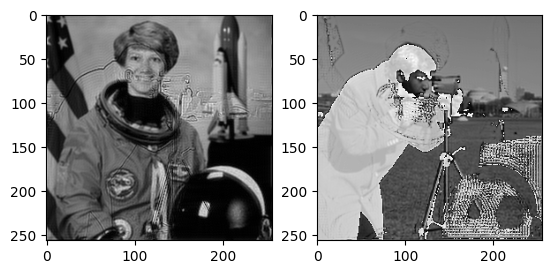

In [8]:
# Results
io.imshow_collection([np.abs(result), np.angle(result)], cmap=plt.cm.gray)
io.show()

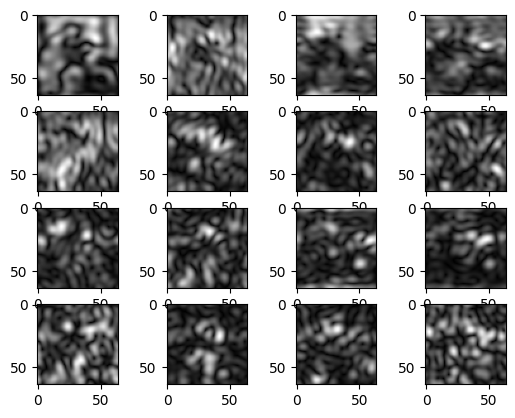

In [9]:
# Simulated images 0 - 15
io.imshow_collection(dataset.images[:16], cmap=plt.cm.gray)
io.show()